# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from HANKStickyModel import HANKStickyModelClass

In [2]:
updated_par = {'phi_G': 0.4,         # mixed financing of fiscal policy shock
                'jump_eg': 0.01,    # 1% government spending shock
                'rho_eg': 0.9,
                'jump_em': 0.0,
                'taylor': 'linear'}
model = HANKStickyModelClass(name='baseline', par={**updated_par ,**{'inattention': 0.0, 'start_dbeg_opti': True}})

In [3]:
model.find_ss(do_print=True)

Find optimal beta for market clearing
final evaluation
household problem in ss solved in 3.9 secs [549 iterations]
household problem in ss simulated in 0.9 secs [365 iterations]
steady state found in 7.0 mins 59 secs
 beta   = 0.9923
 nu     = 0.6703
Discrepancy in L =  -0.00000001
Discrepancy in Y =  -0.00000000
Discrepancy from annual MPC target of 0.525 =  -0.00000000


In [4]:
print(f'beta_grid: {model.par.beta_grid}')
print(f'hh_wealth_ratio: {model.par.hh_wealth_Y_ratio}')
print(f'ss.L_hh: {model.ss.L_hh}')
print(f'ss.A_hh: {model.ss.A_hh}')
print(f'ss.L_hh/A_hh: {model.ss.L_hh/model.ss.A_hh}')

beta_grid: [0.99231676]
hh_wealth_ratio: 15.28
ss.L_hh: 0.4916292775864629
ss.A_hh: 14.788370712260486
ss.L_hh/A_hh: 0.033244316574974106


In [5]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for eg_transfer     in 4.2 secs
curly_Y and curly_D calculated for ez              in 4.2 secs
curly_Y and curly_D calculated for ra              in 3.9 secs
curly_Y and curly_D calculated for rl              in 3.9 secs
curly_Y and curly_D calculated for tau             in 3.8 secs
curly_Y and curly_D calculated for wN              in 3.9 secs
curly_E calculated in 2.6 secs
builiding blocks combined in 1.5 secs
household Jacobian computed in 28.1 secs

full Jacobians:
full Jacobian to unknowns computed in 16.3 secs [in evaluate_path(): 13.2 secs]
full Jacobian to shocks computed in 3.3 secs [in evaluate_path(): 0.4 secs]


In [6]:
print('Annual MPC:')
print(model.jac_hh[('C_hh', 'ez')][0:4, 0].sum())

Annual MPC:
0.5237932393534095


In [7]:
model.find_transition_path(do_print=True, do_print_unknowns=False)

finding the transition path:
 it =   0 -> max. abs. error = 9.25e-04
   0.00e+00 in fisher_res
   4.64e-05 in w_res
   9.25e-04 in clearing_Y
   0.00e+00 in invest_res
   0.00e+00 in valuation_res
 it =   1 -> max. abs. error = 7.28e-06
   0.00e+00 in fisher_res
   9.70e-08 in w_res
   8.07e-07 in clearing_Y
   7.28e-06 in invest_res
   7.53e-09 in valuation_res
 it =   2 -> max. abs. error = 1.57e-07
   0.00e+00 in fisher_res
   1.63e-09 in w_res
   1.78e-08 in clearing_Y
   1.57e-07 in invest_res
   9.23e-11 in valuation_res
 it =   3 -> max. abs. error = 2.15e-09
   0.00e+00 in fisher_res
   2.16e-11 in w_res
   2.44e-10 in clearing_Y
   2.15e-09 in invest_res
   1.25e-12 in valuation_res
 it =   4 -> max. abs. error = 6.52e-11
   0.00e+00 in fisher_res
   3.89e-13 in w_res
   7.33e-12 in clearing_Y
   6.52e-11 in invest_res
   5.86e-14 in valuation_res
 it =   5 -> max. abs. error = 9.67e-13
   0.00e+00 in fisher_res
   4.37e-15 in w_res
   9.41e-14 in clearing_Y
   9.67e-13 in inv

In [8]:
model.find_IRFs()

### shocks ###


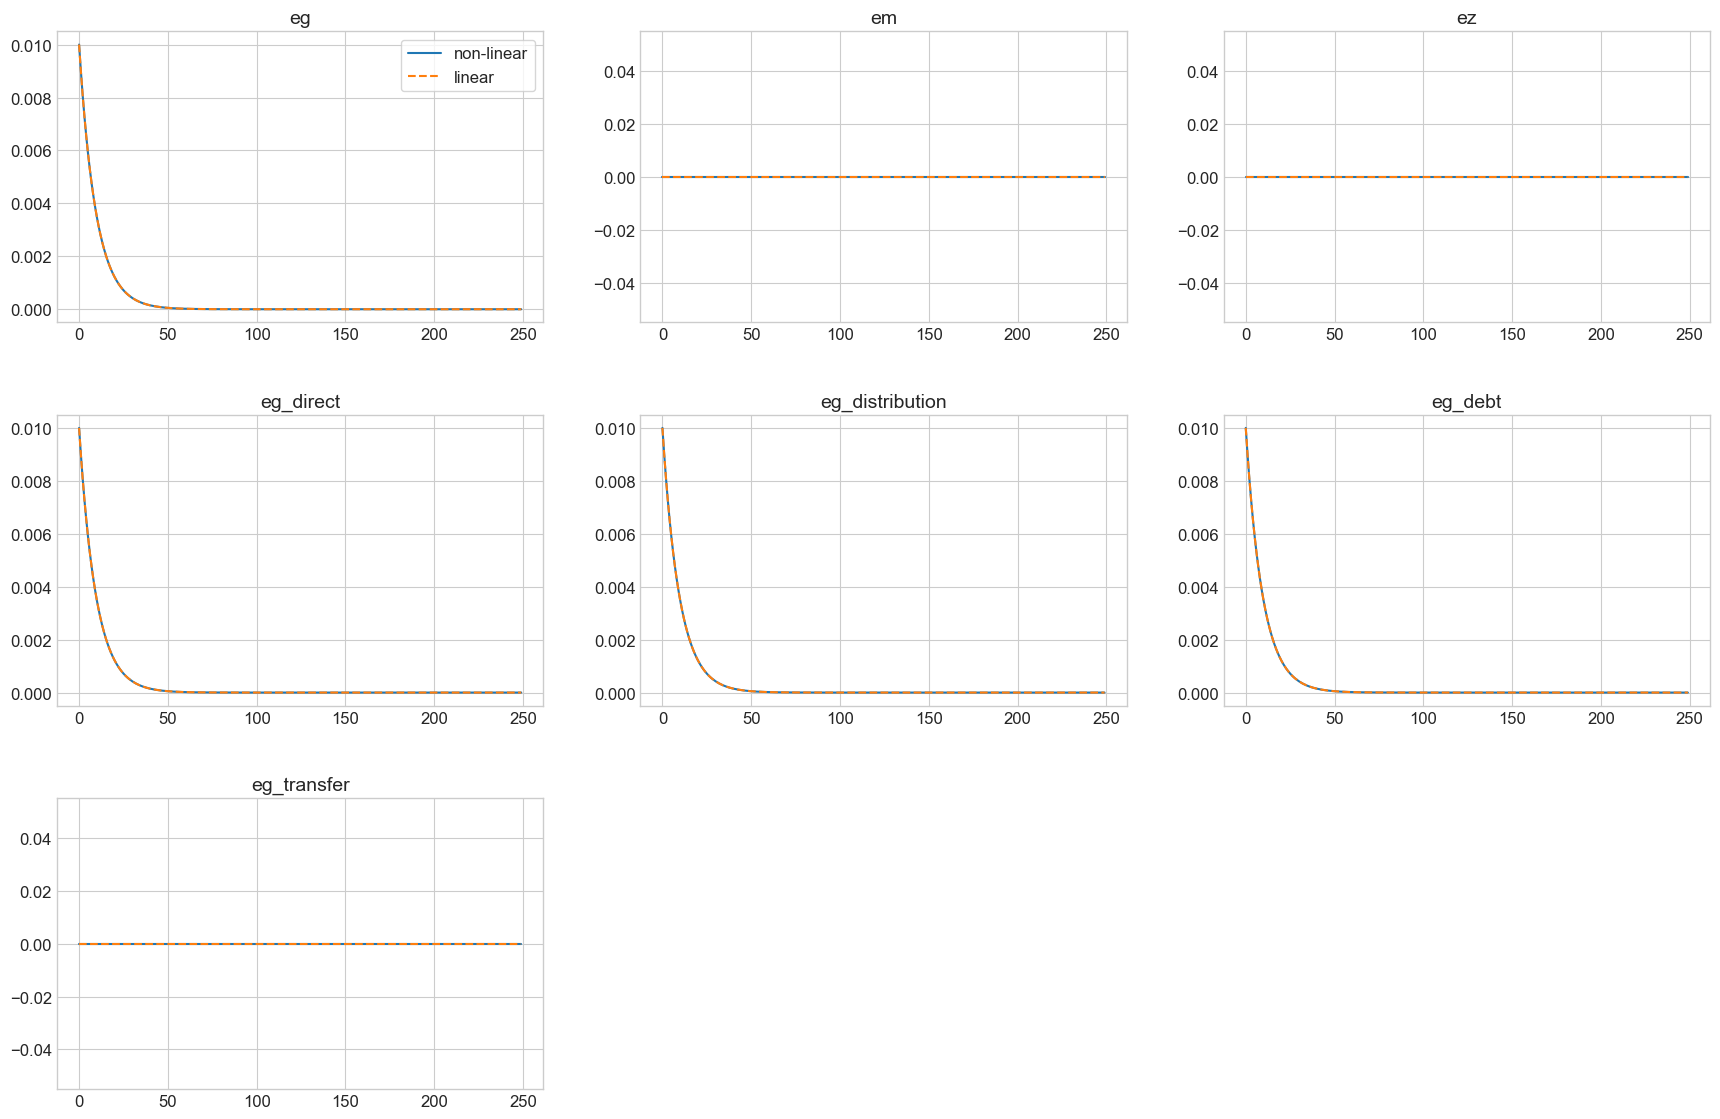


### varnames ###


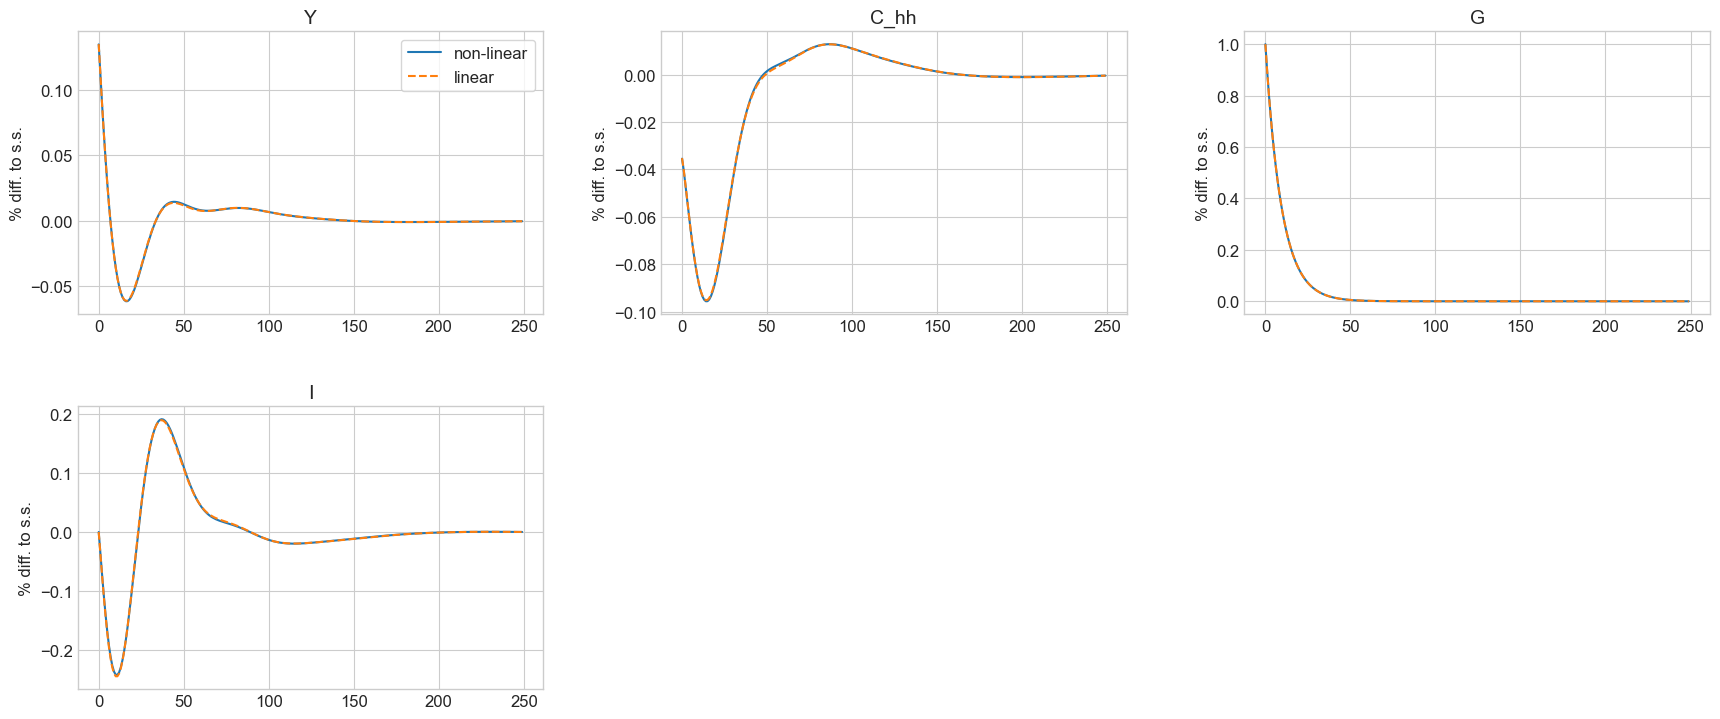


### tagets ###


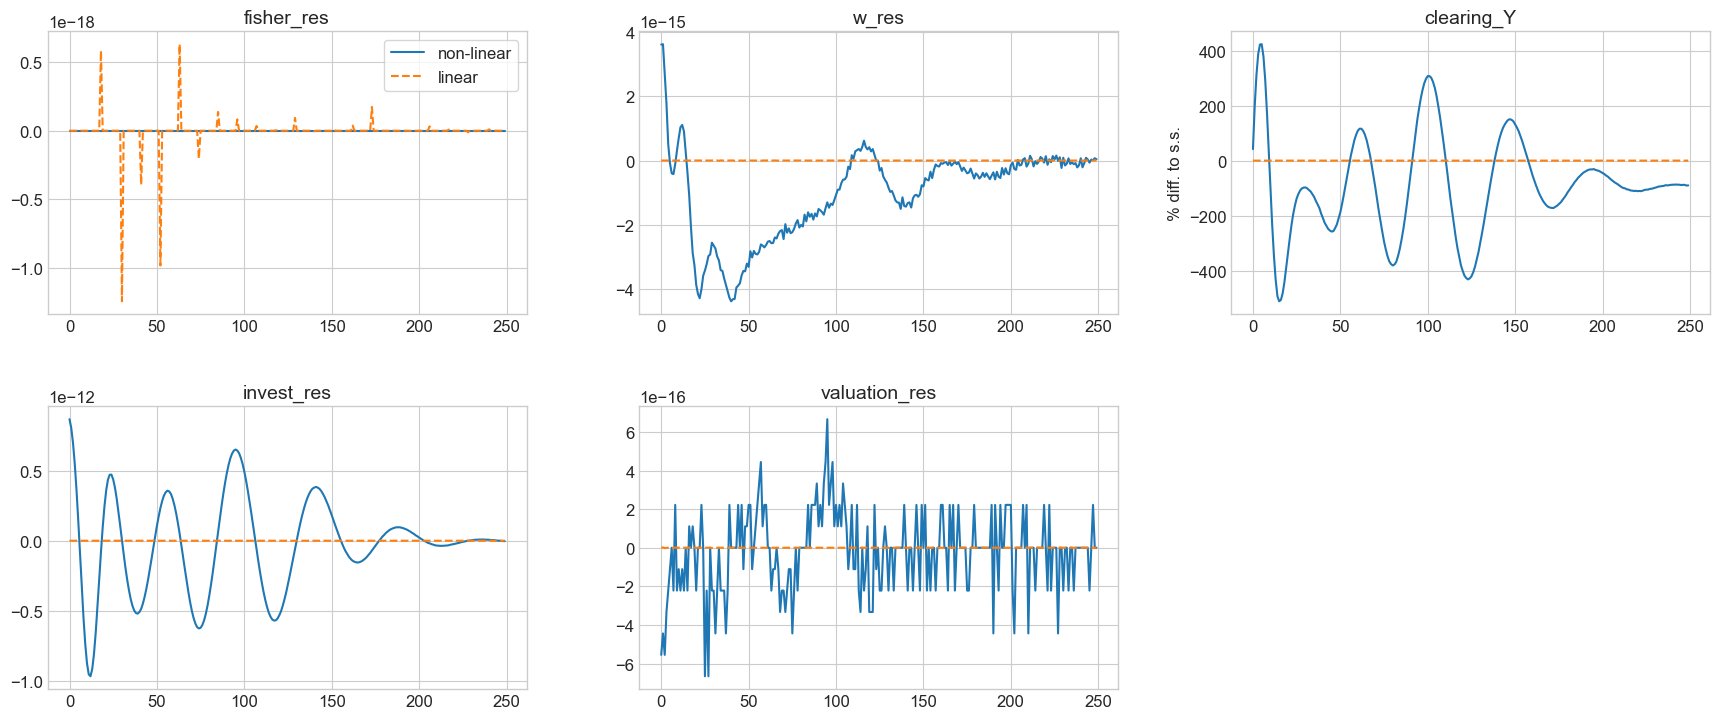

In [9]:
models = [model]
labels = ['baseline no sticky',]
paths = ['Y', 'C_hh', 'G', 'I']
paths_short = ['Y', 'C_hh', 'G']
lvl_value = ['eg', 'eg_direct', 'eg_distribution', 'eg_debt', 'eg_transfer', 'ez', 'em',  'r', 'tau', 'rk']
facs = {'r':100}
model.show_IRFs(paths,lvl_value=lvl_value,facs=facs,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True)

# Misc

In [10]:
# model.print_unpack_varlist()

In [11]:
# model.check_non_lin(0)

In [12]:
# print(np.max(path.A - path.A_hh))